### <center>Face Recognition System<center>
The face recognition system consists of a feature extraction step and a classification step. 
Principal component analysis (PCA) is widely used in such scenarios to construct the feature 
space and extract features, substantially reducing the dimensionality of the input feature 
vector/image. The reduced feature vector can then be used for the purpose of face analysis.
Question:
Using PCA create a face recognition system that gives access to only certain people. To 
implement this, you can use LFW_peoples dataset provided in the scikit-learn library.
Given this dataset, use only those classes that have a minimum (use
min_faces_per_person = 70, resize = 0.4 ) 70 images (should give you only 
11 classes). Given this subset of images, apply PA to obtain the corresponding eigen face 
for each class. You can additionally train a classifier for recognition purpose.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
# Load LFW dataset and filter classes with at least 70 images
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_dataset.data
y = lfw_dataset.target

In [12]:
# Number of classes and images in each class
n_classes = len(np.unique(y))
images_per_class = np.bincount(y)

In [13]:
# Filter classes with at least 70 images
selected_classes = np.where(images_per_class >= 70)[0]
X_filtered = np.concatenate([X[y == i] for i in selected_classes], axis=0)
y_filtered = np.concatenate([y[y == i] for i in selected_classes], axis=0)


In [14]:
# Perform PCA to obtain eigenfaces for each class
n_components = 100  # You can adjust this number as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_filtered)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_filtered, test_size=0.2, random_state=42)


In [16]:
# Train a classifier for recognition purpose
classifier = SVC(kernel='linear', C=0.1)
classifier.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [17]:
# Predict on the test set
y_pred = classifier.predict(X_test)

In [18]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [19]:
# Visualize eigenfaces for each class
eigenfaces = pca.components_.reshape((n_components, lfw_dataset.images.shape[1], lfw_dataset.images.shape[2]))

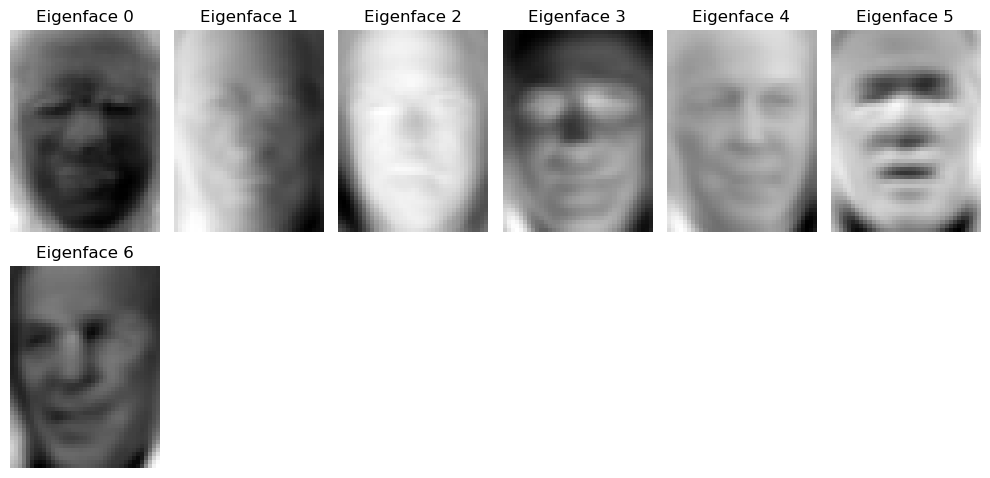

In [20]:
plt.figure(figsize=(10, 5))
for i in range(n_classes):
    plt.subplot(2, 6, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.76      0.76      0.76        17
     Colin Powell       0.78      0.76      0.77        50
  Donald Rumsfeld       0.61      0.73      0.67        26
    George W Bush       0.87      0.82      0.84       104
Gerhard Schroeder       0.70      0.70      0.70        20
      Hugo Chavez       0.85      0.85      0.85        13
       Tony Blair       0.80      0.86      0.83        28

         accuracy                           0.79       258
        macro avg       0.77      0.78      0.77       258
     weighted avg       0.80      0.79      0.79       258

